# ENSEMBLE BETA + SURFEX models' error metrics:


In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('surfex_output_path', surfex_output_path)
print('temp_output_path', temp_output_path)
print('temp_obs_col', temp_obs_col)
print('models_cols', models_cols)
print('ens_beta_col', ens_beta_col)

surfex_output_path ..\data\surfex\output
temp_output_path ..\data\observations\temp\output
temp_obs_col 17
models_cols [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ens_beta_col 18


### Loading the data from file - JJA

In [4]:
df_all_jja = load_csv2df('surfex_join_obs_jja.csv', surfex_output_path, freq_index='3H')

In [5]:
df_all_jja.head()

0          1          2          3          4   \
date                                                                         
1979-06-01 00:00:00  15.175944  16.408971  16.866713  15.531927  15.734511   
1979-06-01 03:00:00  14.294798  15.953402  14.687100  15.575995  14.792961   
1979-06-01 06:00:00  13.266676  15.269643  13.399966  15.176057  13.846416   
1979-06-01 09:00:00  14.790693  16.824352  16.828873  15.340935  15.693357   
1979-06-01 12:00:00  17.810620  19.931702  22.308535  16.713857  20.424870   

                            5          6          7          8          9   \
date                                                                         
1979-06-01 00:00:00  12.655543  14.387332  13.355735  18.006408  20.958358   
1979-06-01 03:00:00  11.754997  13.623897  12.511571  17.636460  19.883455   
1979-06-01 06:00:00  10.958006  13.266368  11.816425  17.347856  19.022454   
1979-06-01 09:00:00  12.071185  14.385000  14.182363  20.537705  20.569344   
1979-06-01 12:00:00  13.967342  17.898582  18.304743  26.120780  24.715534   

                            10         11         12         13         14  \
date                                                                         
1979-06-01 00:00:00  16.627010  18.272816  13.929665  16.386445  16.914535   
1979-06-01 03:00:00  16.634043  18.086907  13.315412  16.360259  16.423232   
1979-06-01 06:00:00  15.514045  17.738151  12.737732  16.297265  15.719568   
1979-06-01 09:00:00  15.856026  18.181752  14.812698  17.389677  15.782042   
1979-06-01 12:00:00  17.958413  20.074247  18.074111  20.543448  19.492173   

                            15         16         17  
date                                                  
1979-06-01 00:00:00  16.805487  13.160482  12.933333  
1979-06-01 03:00:00  16.618308  13.150757  12.233333  
1979-06-01 06:00:00  16.330353  14.002542  11.933333  
1979-06-01 09:00:00  15.614238  15.978520  15.533333  
1979-06-01 12:00:00  16.292591  19.330162  18.900000

### Time series with all models' data together

In [6]:
# df only for observations, df_models
df_obs, df_models = df_all_jja[[temp_obs_col]], df_all_jja[models_cols]

# make a single column, 18, with all models . Add the observations
df_models = df_models.stack().to_frame(name=ens_beta_col)
df_models.reset_index(level=1, drop=True, inplace=True)
df_all_jja_ens = df_models.join(df_obs, how='left')
df_all_jja_ens.head()

18         17
date                            
1979-06-01  15.175944  12.933333
1979-06-01  16.408971  12.933333
1979-06-01  16.866713  12.933333
1979-06-01  15.531927  12.933333
1979-06-01  15.734511  12.933333

In [7]:
# df only for observations, df_models
df_bias, _ = metric_by_hour(bias, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_bias
#0.742861	0.790871	0.992737	1.161952	0.328696	-0.911905	-0.637755	0.085488

0         3         6         9         12        15        18  \
18  0.742861  0.790871  0.992737  1.161952  0.328696 -0.911905 -0.637755   

          21  
18  0.085488

In [8]:
# df only for observations, df_models
df_perkins, _ = metric_by_hour(perkins_skill_score, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_perkins


# 87.816141	87.055982	83.264659	78.831581	89.322251	84.093492	88.164251	92.791513

0          3          6          9          12         15  \
18  87.816141  87.055982  83.264659  78.831581  89.322251  84.093492   

           18         21  
18  88.164251  92.791513

In [9]:
# df only for observations, df_models
df_sigma, _ = metric_by_hour(sigma_score, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_sigma
# 1.055862	1.097653	1.179655	1.251657	1.255177	1.272607	1.186903	1.108746

0         3         6         9         12        15        18  \
18  1.055862  1.097653  1.179655  1.251657  1.255177  1.272607  1.186903   

          21  
18  1.108746

In [10]:
# df only for observations, df_models
df_yk, _ = YK_skewness_by_hour(df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_yk
# -0.092101	-0.103205	-0.116634	-0.141199	-0.110697	-0.135273	-0.119809	-0.105992

0         3         6         9         12        15        18  \
18 -0.092101 -0.103205 -0.116634 -0.141199 -0.110697 -0.135273 -0.119809   

          21  
18 -0.105992

### Sigma score - Normalized standard deviation measure

In [11]:
df_sigma_jja, _ = metric_by_hour(sigma_score, df_all_jja, models_cols, temp_obs_col)
df_sigma_jja

0         3         6         9         12        15        18  \
0   1.080925  1.097313  1.154722  1.312362  1.387287  1.419202  1.290030   
1   1.060013  1.096621  1.194444  1.189317  1.101499  1.129578  1.108012   
2   0.994947  1.024660  1.093060  1.203950  1.328366  1.409841  1.283059   
3   0.865407  0.861159  0.900857  1.008031  1.119666  1.198436  1.112449   
4   1.112162  1.149358  1.224646  1.209722  1.043254  1.058247  1.071623   
5   0.906417  0.918924  0.973698  1.079806  1.116034  1.157099  1.083379   
6   1.169766  1.205703  1.331968  1.495752  1.387384  1.318990  1.268586   
7   1.132868  1.160488  1.307861  1.538529  1.572473  1.571322  1.427931   
8   1.036314  1.127220  1.174342  1.209388  1.262293  1.280623  1.092700   
9   1.110742  1.125613  1.187127  1.200770  1.080819  1.092257  1.115779   
10  0.947762  0.967421  1.027001  1.078522  1.032106  1.042825  1.026470   
11  0.992318  0.997068  1.042177  1.179809  1.268459  1.330683  1.239629   
12  1.120591  1.135114  1.216373  1.254706  1.193772  1.236372  1.235879   
13  0.869033  0.975092  1.065504  1.120469  1.134157  1.060327  0.902264   
14  0.945411  0.977171  1.059688  1.053977  0.949848  0.979321  0.965273   
15  0.888638  0.902695  0.974711  0.986583  0.958930  1.032952  1.015446   
16  0.772706  0.813727  0.876551  0.976153  1.069823  1.097193  0.979625   

          21  
0   1.171467  
1   1.097413  
2   1.107915  
3   0.973694  
4   1.116131  
5   0.988576  
6   1.226804  
7   1.264681  
8   0.990677  
9   1.148763  
10  0.989273  
11  1.107971  
12  1.203242  
13  0.824704  
14  0.964349  
15  0.962618  
16  0.845461

### Perkins skill score

In [12]:
df_perkins_jja, _ = metric_by_hour(perkins_skill_score, df_all_jja, models_cols, temp_obs_col)
df_perkins_jja

0          3          6          9          12         15  \
0   79.830918  78.784219  74.597424  75.483092  83.051530  81.481481   
1   83.132045  82.769726  78.180354  62.278583  75.966184  90.177134   
2   71.900161  70.330113  66.183575  64.251208  78.421900  81.280193   
3   66.908213  64.251208  58.454106  62.238325  89.613527  87.520129   
4   88.405797  88.566828  83.373591  70.813205  88.123994  89.533011   
5   70.088567  66.223833  63.083736  67.834138  92.592593  82.085346   
6   79.307568  80.595813  77.616747  64.291465  67.552335  74.838969   
7   66.988728  64.452496  61.191626  58.574879  68.478261  74.315620   
8   77.576490  82.769726  81.843800  86.352657  84.742351  83.735910   
9   89.734300  89.895330  90.217391  82.085346  92.028986  87.560386   
10  92.149758  91.344605  94.967794  84.339775  88.687601  95.370370   
11  93.599034  92.632850  88.164251  86.956522  85.305958  76.127214   
12  87.037037  88.405797  84.460548  79.790660  85.426731  70.088567   
13  85.225443  87.439614  84.943639  93.518519  83.293076  80.958132   
14  92.351047  93.840580  93.921095  82.246377  92.512077  85.909823   
15  86.553945  89.210950  94.887279  95.209340  69.565217  54.669887   
16  89.371981  88.808374  90.056361  89.814815  84.782609  75.724638   

           18         21  
0   86.674718  89.412238  
1   91.545894  88.969404  
2   85.748792  81.441224  
3   92.995169  85.104670  
4   89.734300  90.297907  
5   87.640902  89.049919  
6   78.703704  79.549114  
7   77.053140  75.281804  
8   92.512077  85.869565  
9   86.916264  86.433172  
10  94.082126  91.827697  
11  81.280193  90.780998  
12  72.342995  83.011272  
13  88.083736  92.471820  
14  85.185185  87.198068  
15  57.729469  70.531401  
16  78.824477  84.057971

### Yule-Kendall skewness 

In [13]:
df_yk_jja, _ = YK_skewness_by_hour(df_all_jja, models_cols, temp_obs_col)
df_yk_jja

0         3         6         9         12        15        18  \
0  -0.060422 -0.107927 -0.158873 -0.156788 -0.094144 -0.108168 -0.096529   
1  -0.056757 -0.044282 -0.026562 -0.110714 -0.121042 -0.134625 -0.106493   
2  -0.136376 -0.190248 -0.204496 -0.174590 -0.085909 -0.109519 -0.114976   
3   0.032949 -0.043853 -0.121142 -0.090826 -0.084666 -0.094259 -0.047668   
4   0.035726  0.059829  0.045080  0.022856  0.009507 -0.068387 -0.054778   
5  -0.177488 -0.214680 -0.233745 -0.216391 -0.124385 -0.129042 -0.118148   
6  -0.210399 -0.220711 -0.234738 -0.172770  0.001337 -0.023965 -0.088170   
7  -0.305701 -0.305915 -0.325870 -0.258439 -0.135684 -0.159407 -0.229234   
8   0.039076  0.060840  0.040538 -0.011723 -0.021605 -0.009643  0.003872   
9   0.035172  0.035818  0.011233  0.022771  0.027758 -0.055819 -0.027171   
10 -0.004229 -0.020072 -0.052170 -0.028197  0.041621  0.047179  0.041333   
11 -0.021452 -0.075501 -0.128510 -0.092282 -0.069151 -0.108456 -0.075272   
12 -0.014022 -0.009338 -0.013762 -0.039056 -0.109833 -0.173501 -0.129870   
13 -0.067463 -0.030409 -0.024839 -0.052629  0.004168 -0.048822 -0.061570   
14  0.012935  0.029443  0.011838 -0.010836 -0.007281 -0.033348 -0.022257   
15 -0.010166 -0.011781 -0.026208 -0.014465 -0.058714 -0.113795 -0.073030   
16 -0.233605 -0.299598 -0.313926 -0.270165 -0.211992 -0.204913 -0.167283   

          21  
0  -0.063925  
1  -0.084294  
2  -0.095626  
3   0.005384  
4  -0.008758  
5  -0.133835  
6  -0.160392  
7  -0.277119  
8   0.009245  
9   0.005220  
10  0.029023  
11 -0.008447  
12 -0.074144  
13 -0.093034  
14 -0.017620  
15 -0.020792  
16 -0.151174

## Metrics for all seasons

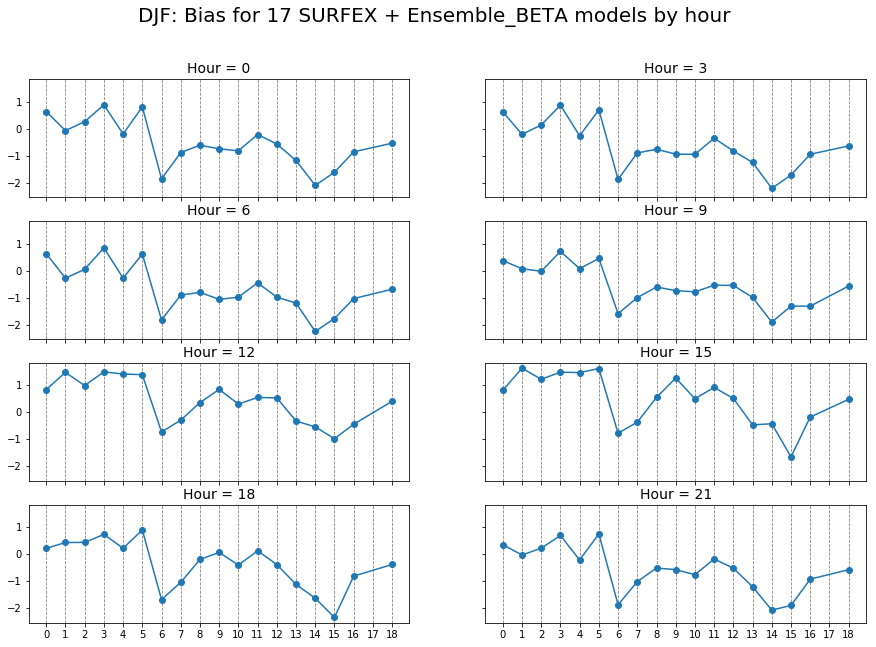

..\plots\output\metrics_ensembles


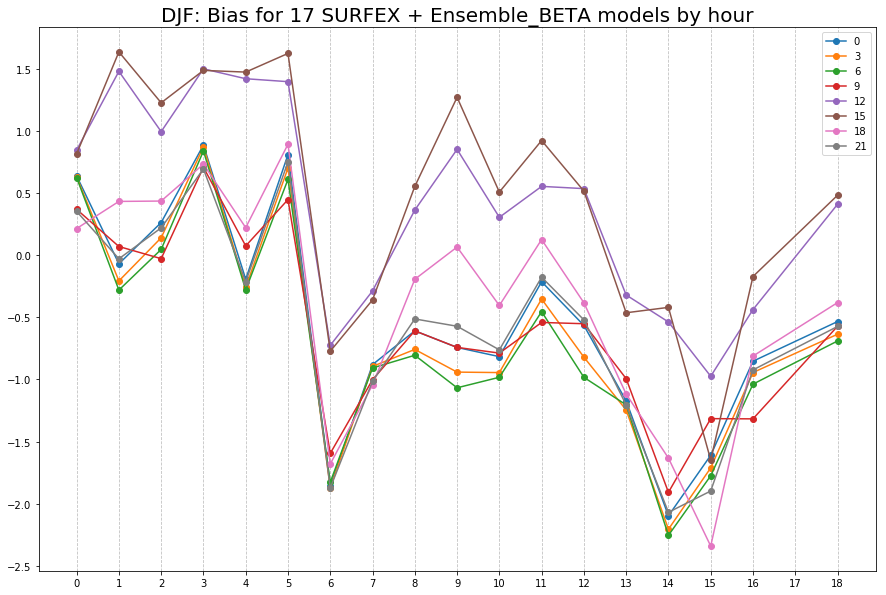

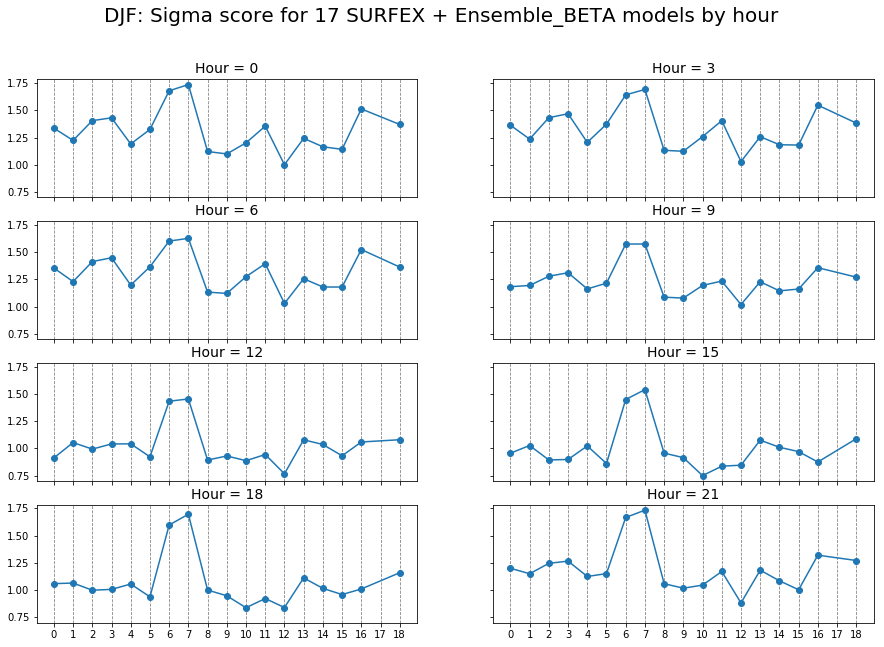

..\plots\output\metrics_ensembles


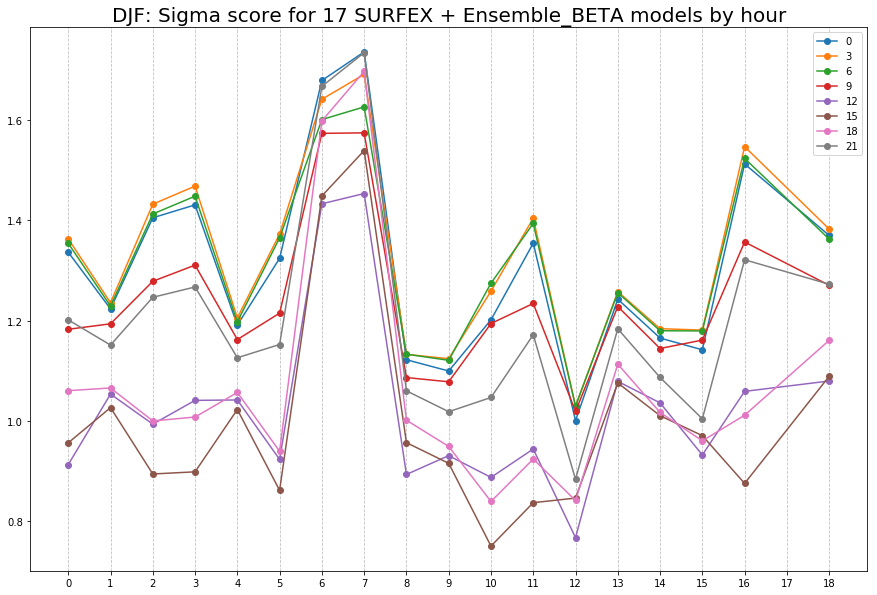

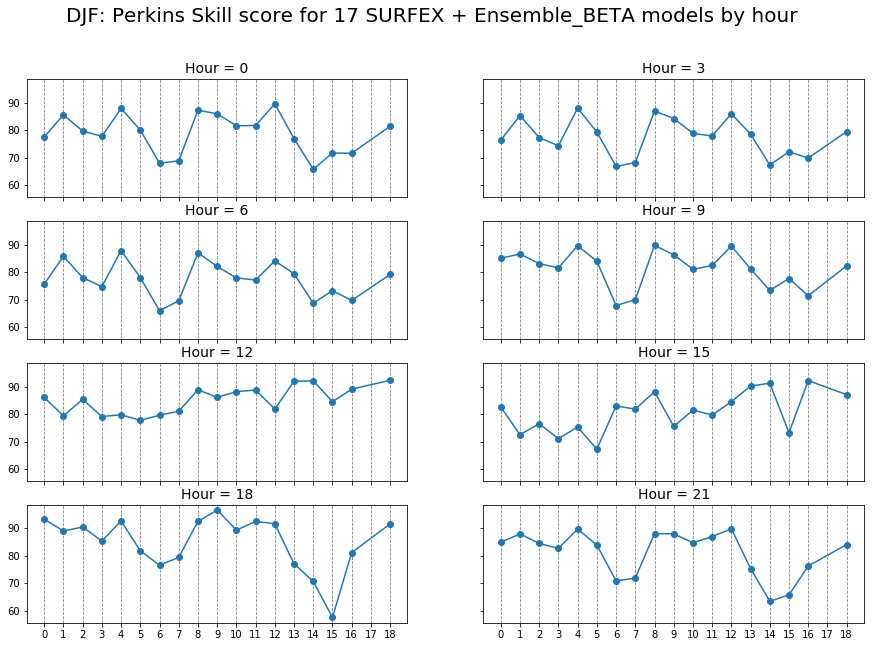

..\plots\output\metrics_ensembles


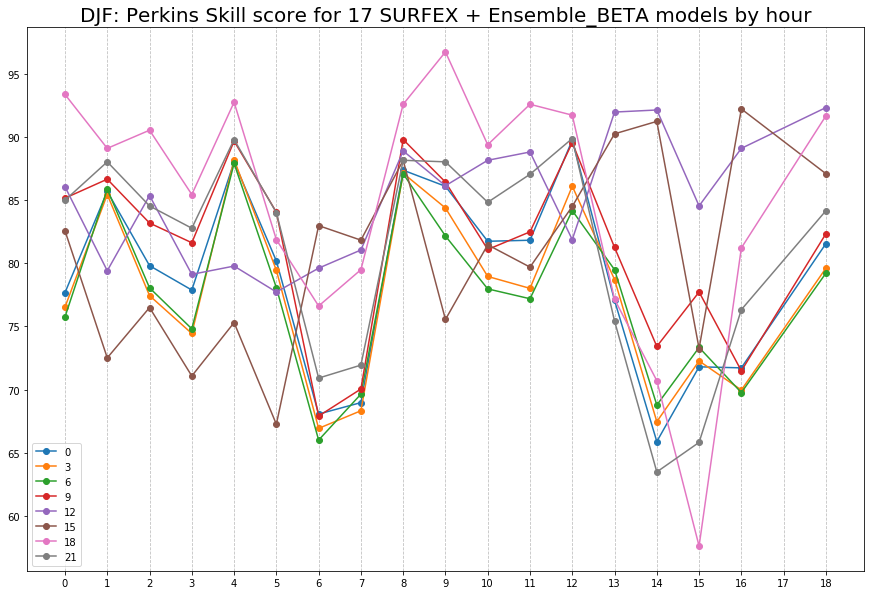

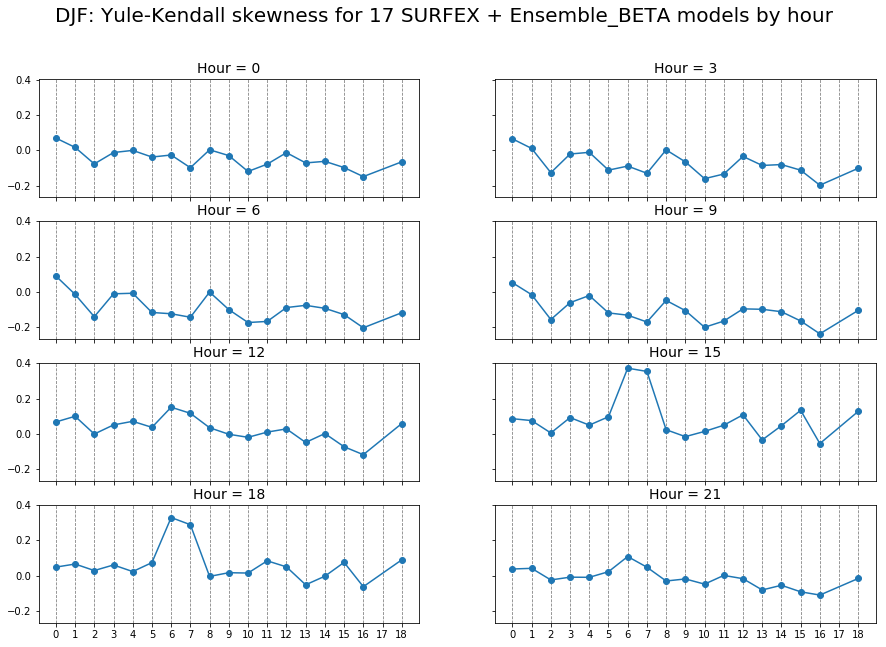

..\plots\output\metrics_ensembles


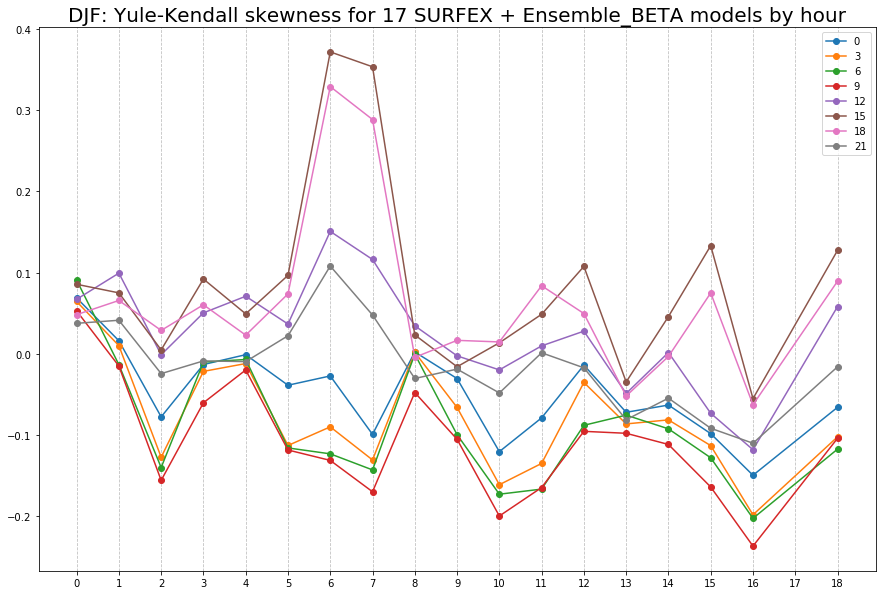

In [14]:
metrics_models_ensemblesBETA('surfex_join_obs_djf.csv', 'DJF', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

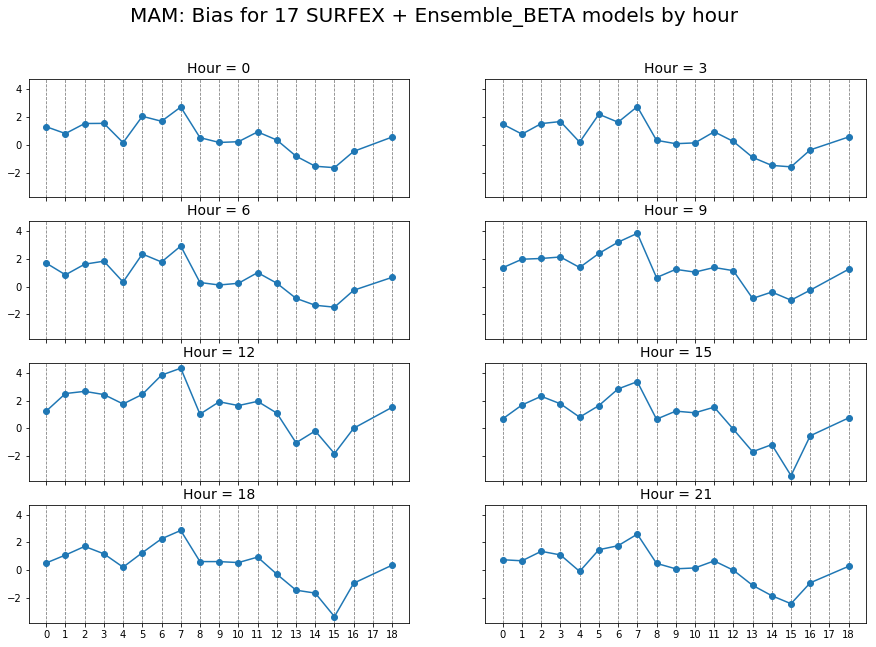

..\plots\output\metrics_ensembles


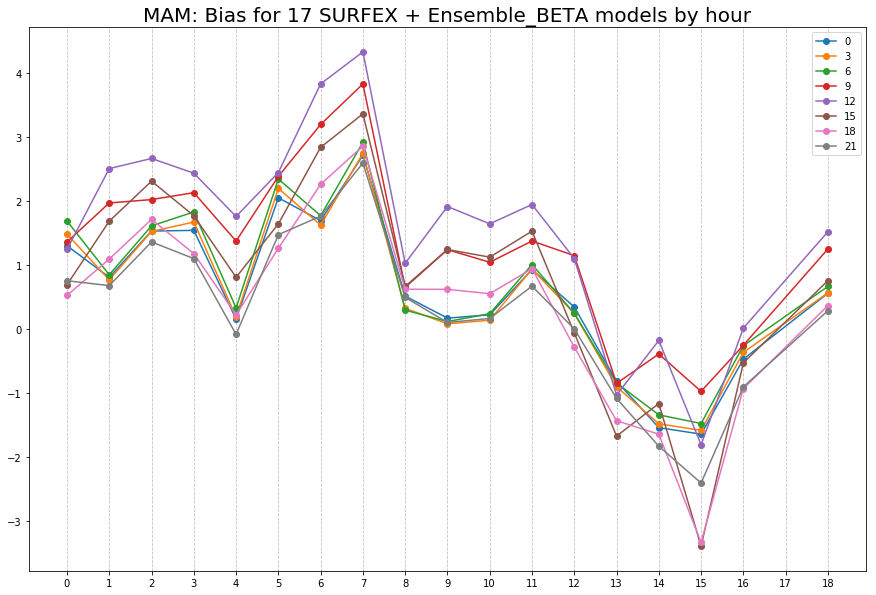

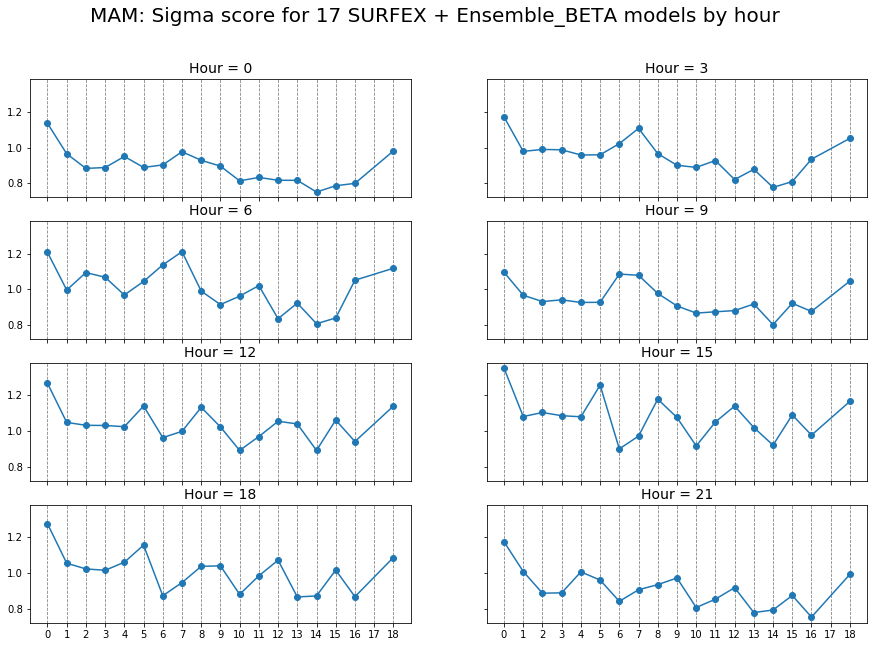

..\plots\output\metrics_ensembles


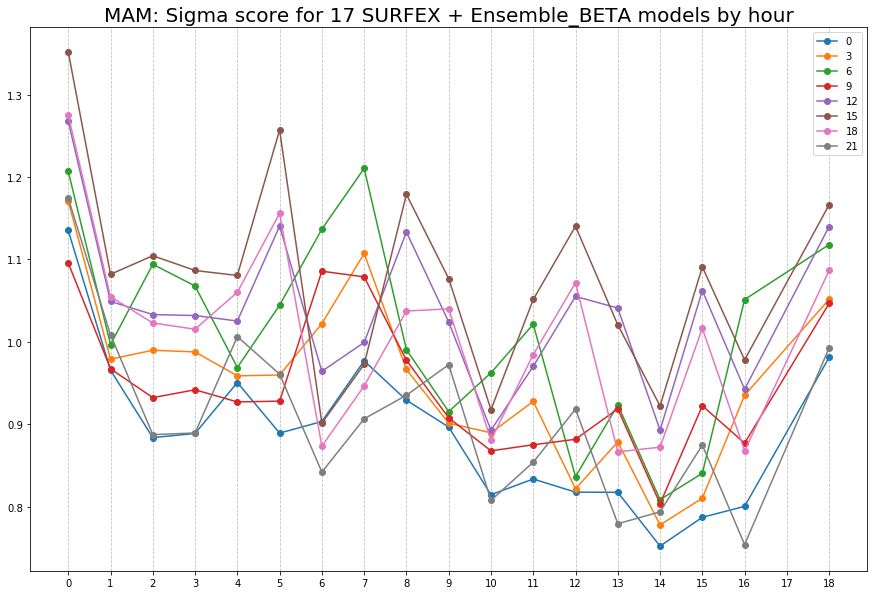

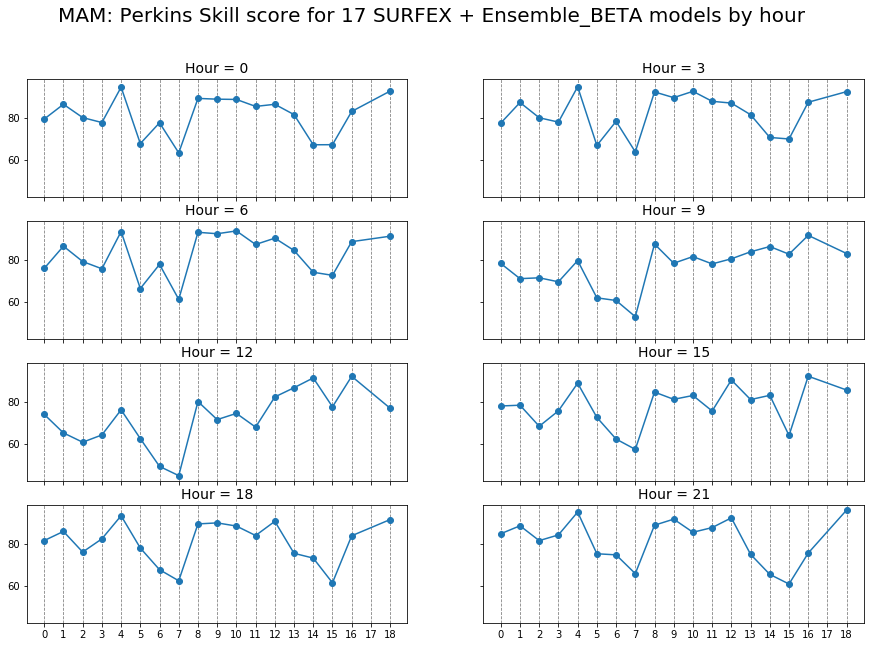

..\plots\output\metrics_ensembles


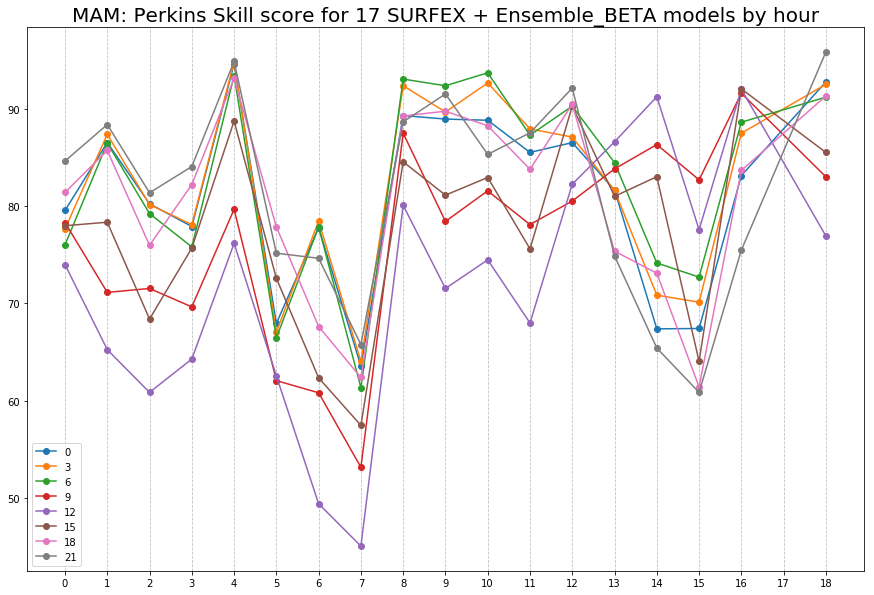

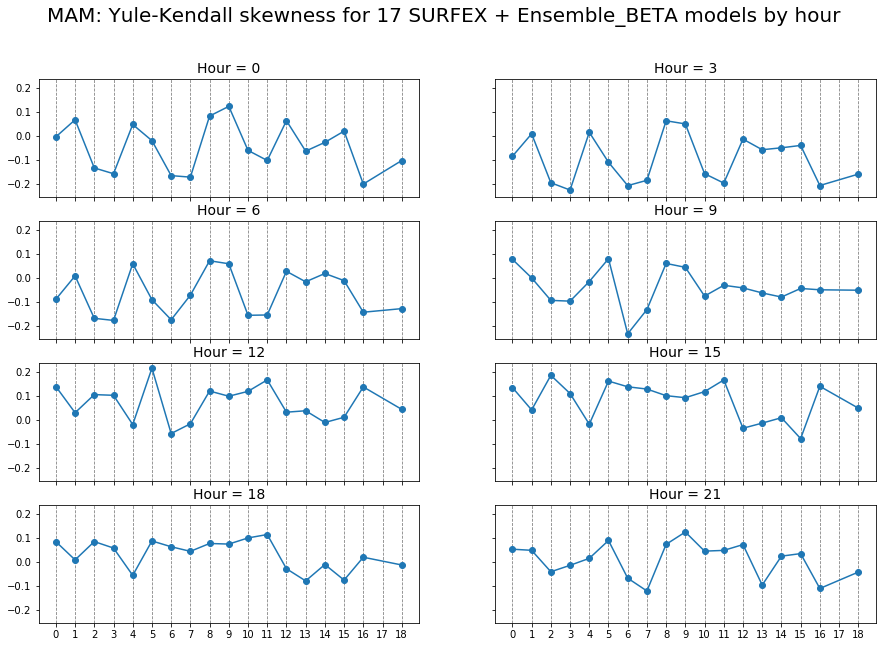

..\plots\output\metrics_ensembles


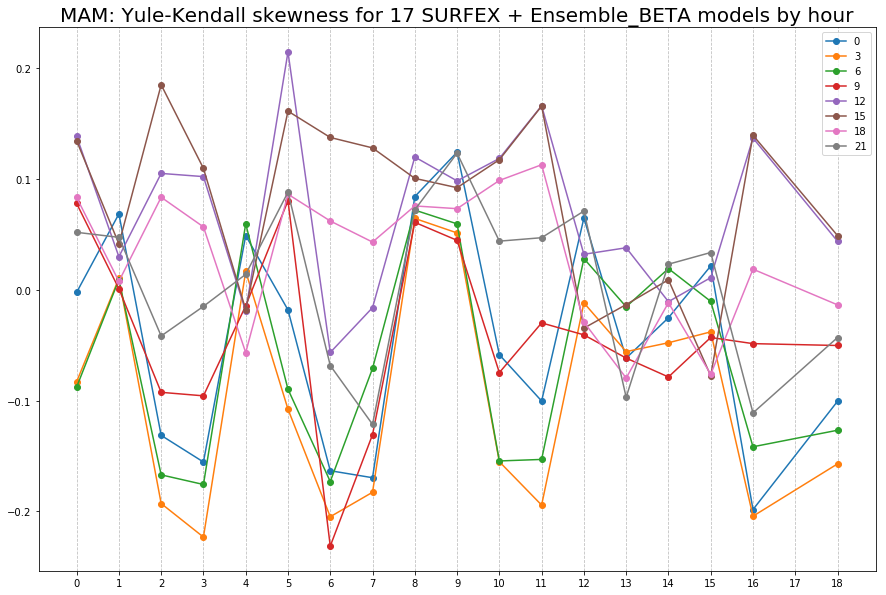

In [15]:
metrics_models_ensemblesBETA('surfex_join_obs_mam.csv', 'MAM', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

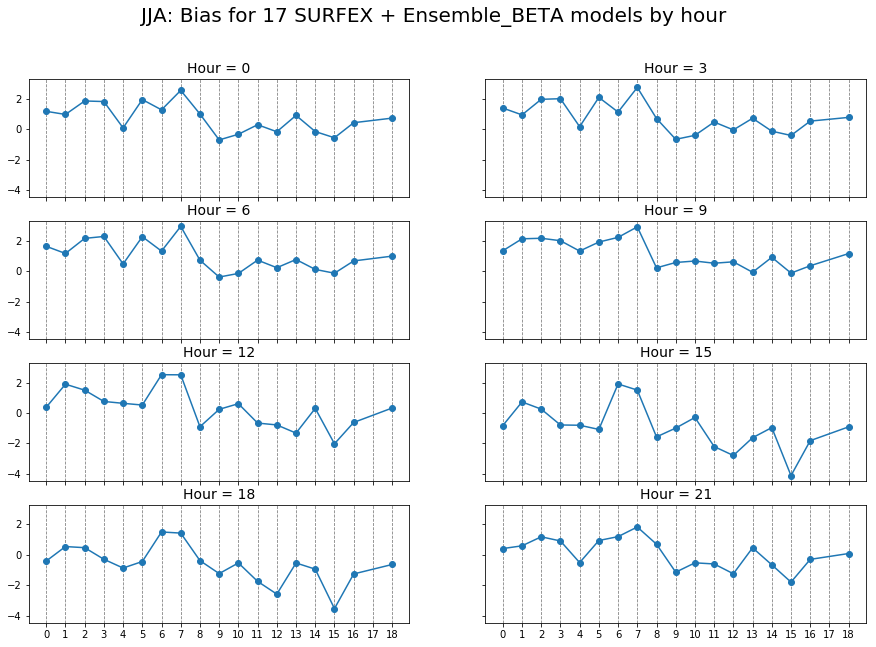

..\plots\output\metrics_ensembles


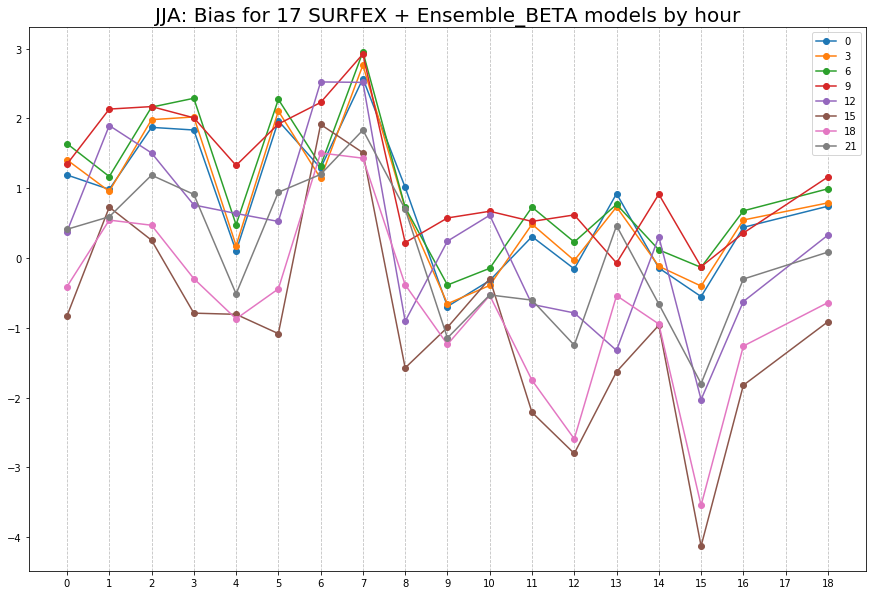

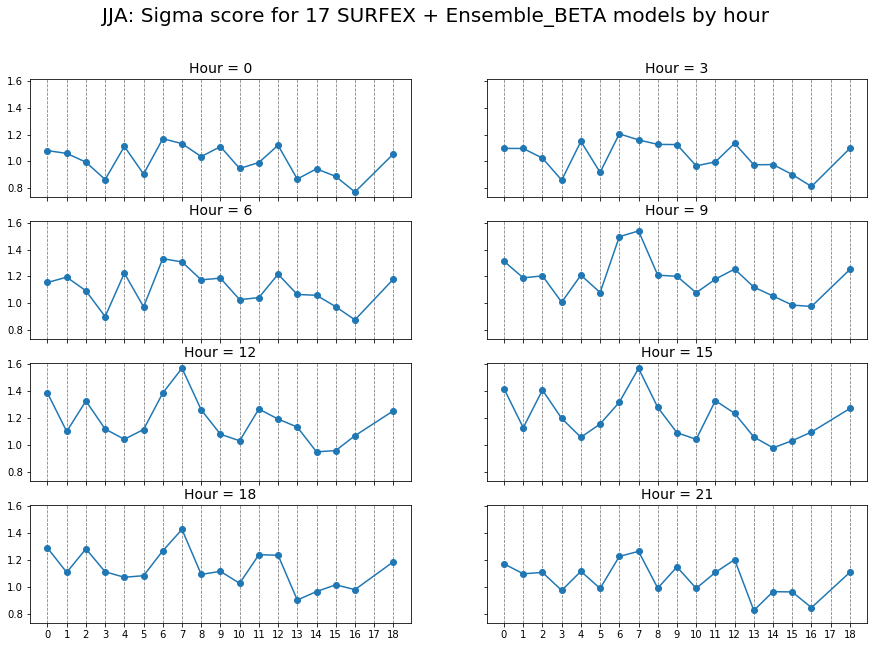

..\plots\output\metrics_ensembles


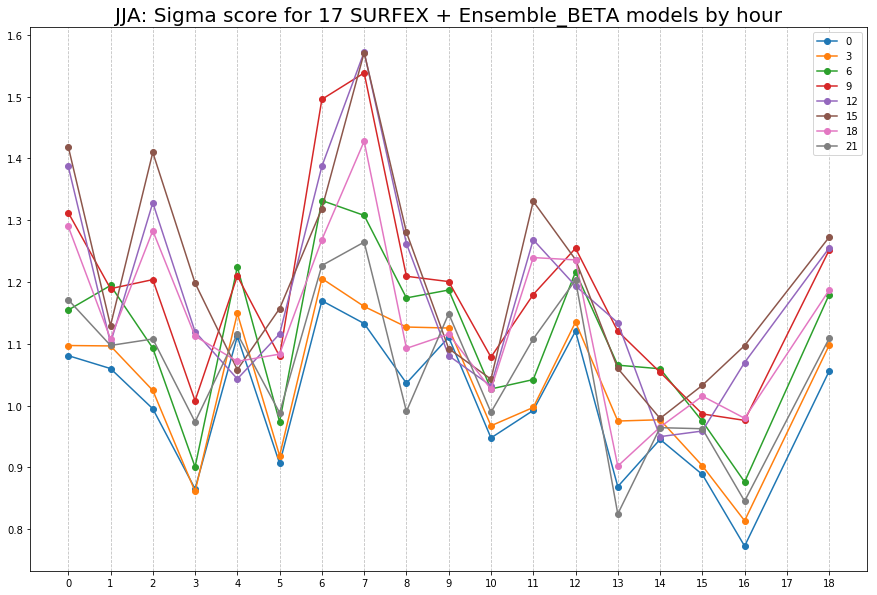

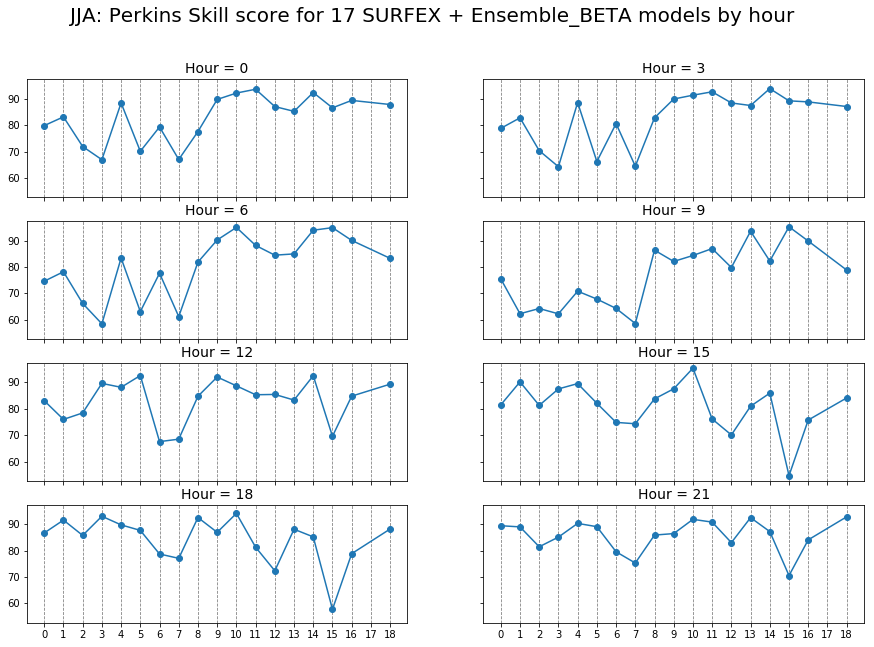

..\plots\output\metrics_ensembles


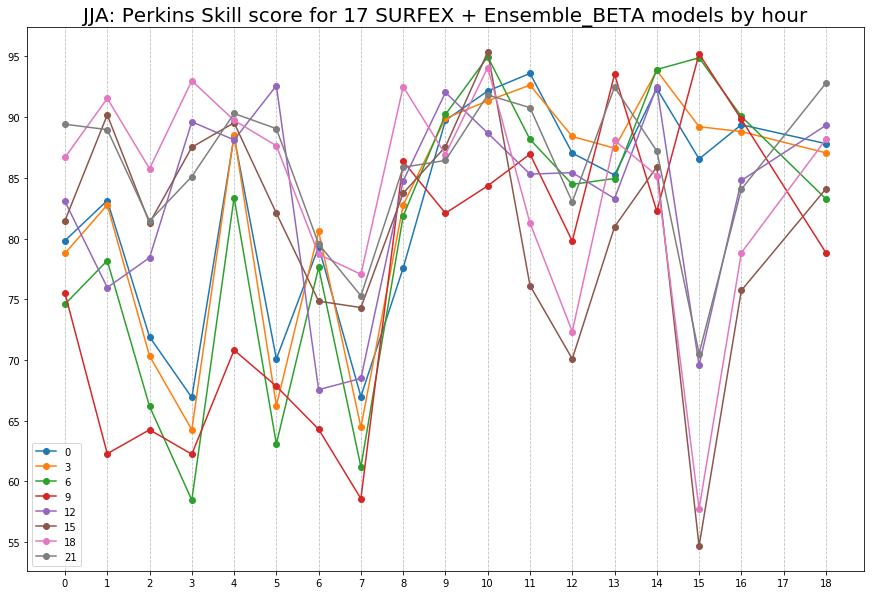

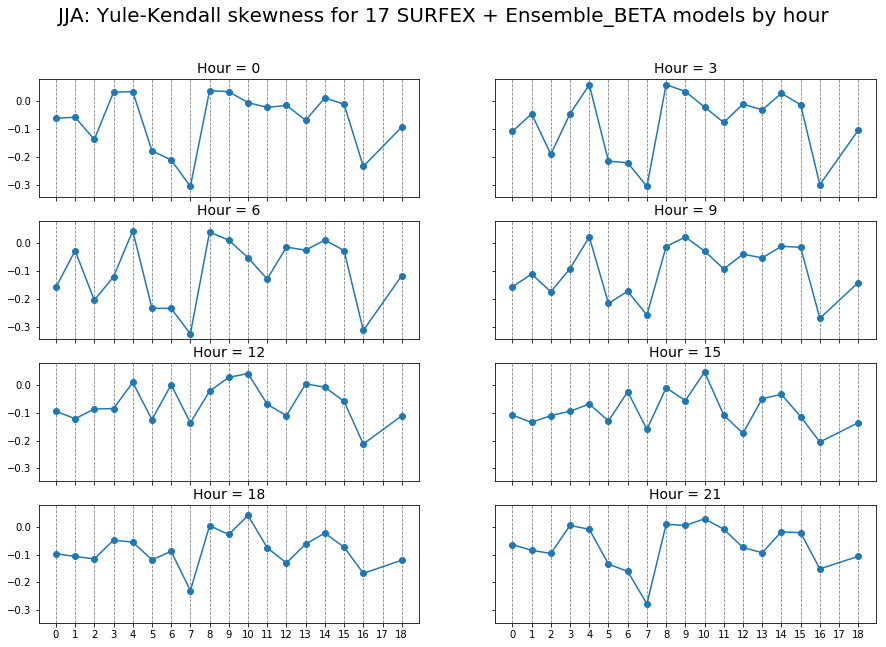

..\plots\output\metrics_ensembles


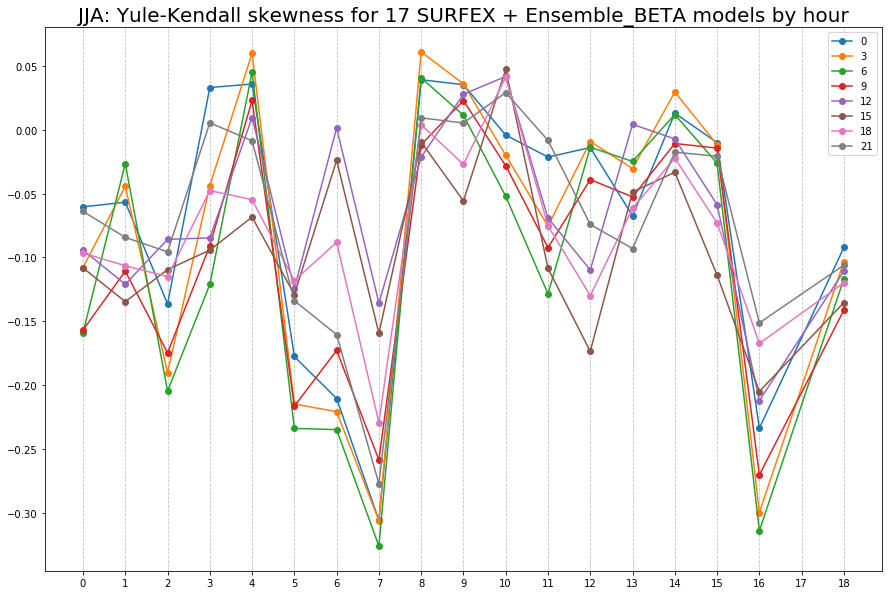

In [16]:
metrics_models_ensemblesBETA('surfex_join_obs_jja.csv', 'JJA', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

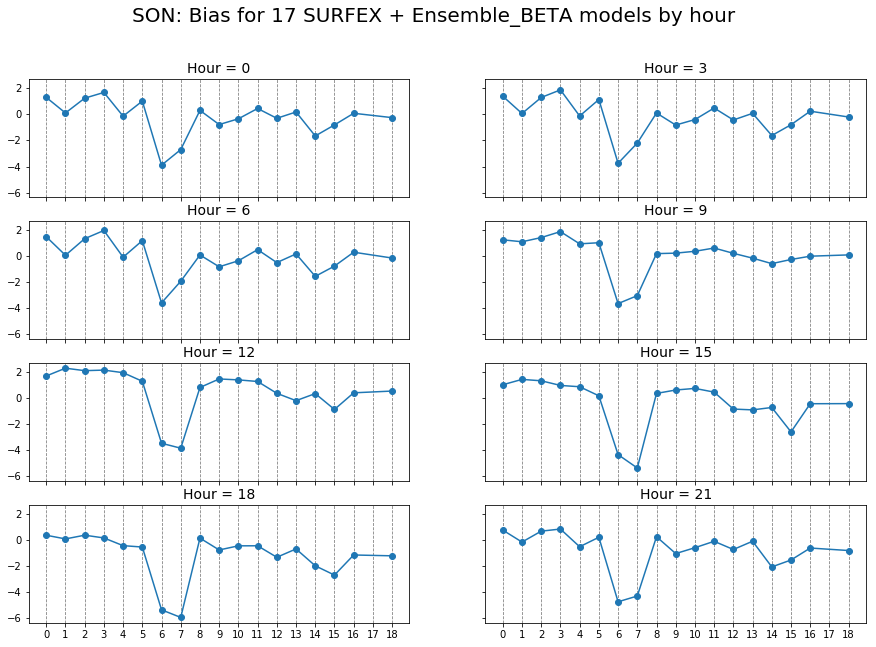

..\plots\output\metrics_ensembles


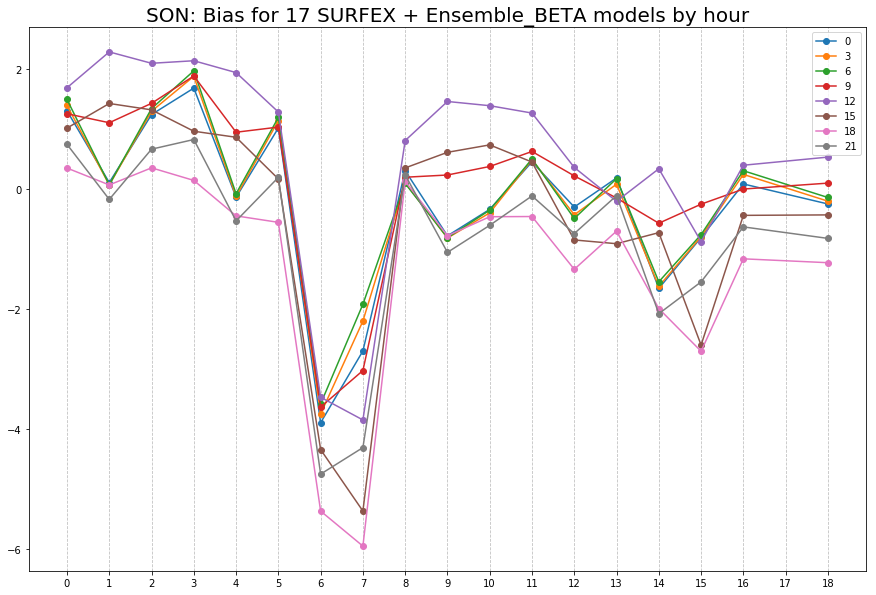

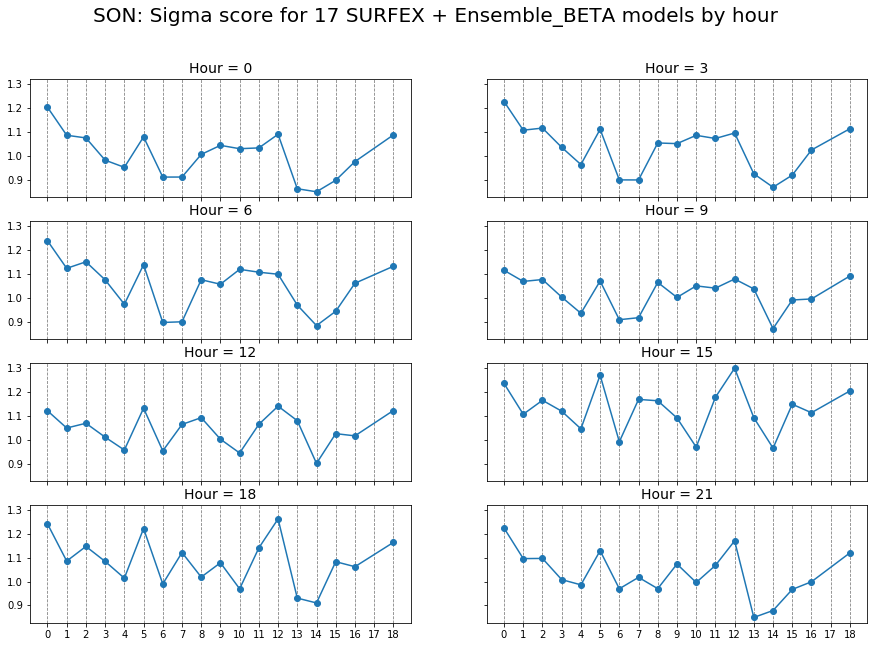

..\plots\output\metrics_ensembles


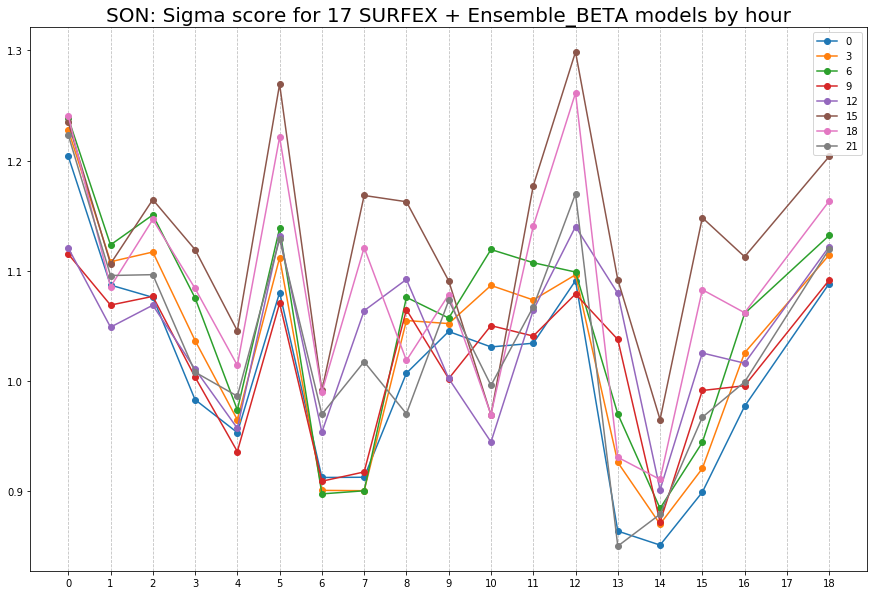

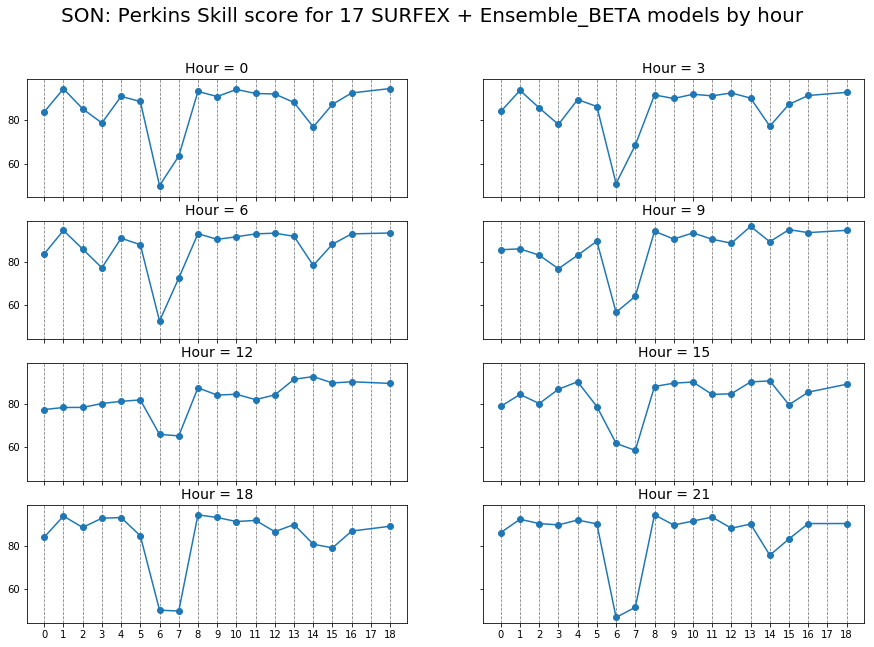

..\plots\output\metrics_ensembles


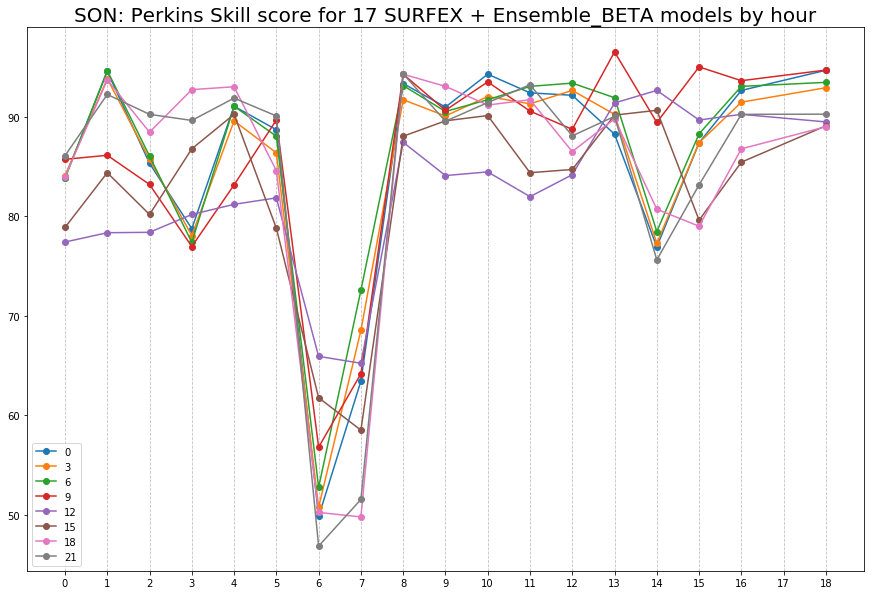

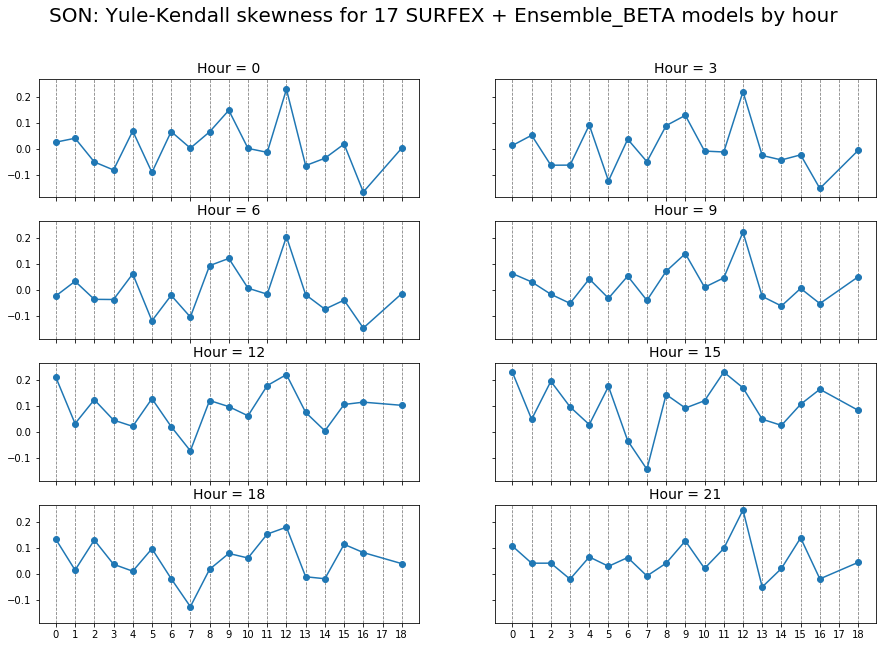

..\plots\output\metrics_ensembles


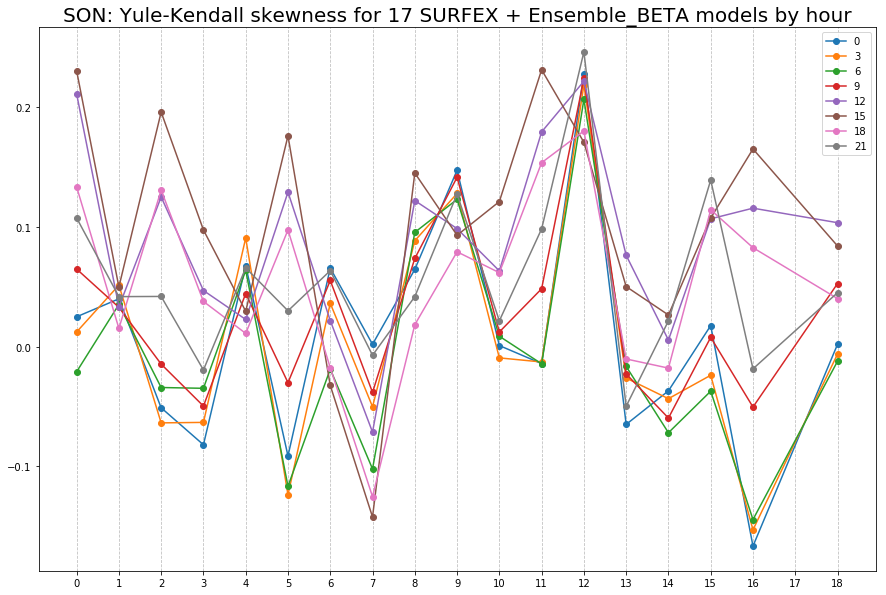

In [17]:
metrics_models_ensemblesBETA('surfex_join_obs_son.csv', 'SON', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

## Show that the used approch is correct

#### pdf for the observations can be calculated in this way

In [18]:
def metric_by_hour_probe(metric, df, model_cols, obs_col):
    res = []
    probes = []
    for hour in range(0,22,3):
        df_filtered = filter_ts_by_hour(df, hour)
        df_metric, probe = metric(df_filtered, model_cols, obs_col)
        res.append(df_metric)
        probes.append(probe)
    return pd.concat(res, axis=1, keys=list(range(0,22,3))), probes


def perkins_skill_score_probe(df, model_cols, obs_col, bins=None):
    def pdf_probe(series, bins = None):
        '''
            pdf for pandas dataSeries, using a numpy array func
            returns both the density and the bin edges
        '''
#         print(series.name)
        density, _ = np.histogram(series, bins = bins, density=True)
        return density
    
    cols = df.columns
    if not bins:
        bins = range(0, 51)   # 0ºC to 50ºC
    list_pdfs = [pdf_probe(s, bins) for _,s in df[cols].items()]
    
    # transpose it!    
    df_pdf = pd.DataFrame(list_pdfs, index=cols, columns=bins[:-1]).T
    return fn_models_obs(minimun, df_pdf, model_cols, obs_col).sum(axis=0)*100, df_pdf

In [19]:
_, probes = metric_by_hour_probe(perkins_skill_score_probe, df_all_jja_ens, ens_beta_col, temp_obs_col)
len(probes)

TypeError: minimun() got an unexpected keyword argument 'axis'

In [ ]:
perkins, probes_all = metric_by_hour_probe(perkins_skill_score_probe, df_all_jja, models_cols, temp_obs_col)
len(probes_all)

### Confirms that the observations pdf are the same

In [ ]:
for p_all,p in zip(probes_all, probes):
    assert (p_all.loc[:,17] == p.loc[:,17]).all()


### YK -  confirm that the observations percentiles are the same in both computations

In [ ]:
def YK_skewness_by_hour_probe(df, model_cols, obs_col):
    def YK_probe(df, model_cols, obs_col):
        df_perc = df[model_cols+[obs_col]].describe(percentiles=[0.05, 0.5, 0.95]).iloc[4:7, :]
        return ((df_perc.loc['95%', :] - df_perc.loc['50%', :]) -\
                (df_perc.loc['50%', :] - df_perc.loc['5%', :]))\
                / (df_perc.loc['95%', :] - df_perc.loc['5%', :]), df_perc
    
    
    df_yk, probe = metric_by_hour_probe(YK_probe, df, model_cols, obs_col)
    return df_yk.loc[model_cols, :].apply(yk_diff, obs = df_yk.loc[obs_col, :], axis=1), probe

In [ ]:
_, probe_all = YK_skewness_by_hour_probe(df_all_jja, models_cols, temp_obs_col)
len(probe_all)

In [ ]:
_, probes  = YK_skewness_by_hour_probe(df_all_jja_ens, ens_beta_col, temp_obs_col)
len(probes)

#### Given the tolerances it seems to be the same result
> If the following equation is element-wise True, then allclose returns True.

> absolute(a - b) <= (atol + rtol * absolute(b))

In [ ]:
atol, rtol  = 1e-04, 1e-03

for idx,(p_all,p) in enumerate(zip(probe_all, probes)):
    if not np.allclose(p_all[17],p[17], rtol=rtol, atol=atol):
        print('\n', idx, p_all[17], p[17])

In [ ]:
for idx,(p_all,p) in enumerate(zip(probe_all, probes)):
    if not np.allclose(p_all[17],p[17], rtol=rtol, atol=atol):
        print('\n', idx, np.allclose(p_all[17],p[17]))

### Sigma

#### Only the observations sigma will be returned

In [ ]:
def fn_models_obs_probe(metric, df_data, model_cols, observation_col):
    return df_data[model_cols].apply(metric, obs = df_data[observation_col], axis=0)


def sigma_score_probe(df, model_cols, obs_col):
    def sigma_probe(s, obs):
        return obs.std()
    
    return fn_models_obs_probe(sigma_probe, df, model_cols, obs_col)

In [ ]:
probes_all = metric_by_hour(sigma_score_probe, df_all_jja, models_cols, temp_obs_col)
probes_all = probes_all.loc[0,:]   # only the observation sigma is returned, all rows are equal

In [ ]:
probes = metric_by_hour(sigma_score_probe, df_all_jja_ens, ens_beta_col, temp_obs_col)
probes

In [ ]:
probes_all.loc[0,:].values - probes.values

In [ ]:
np.allclose(probes_all.loc[0,:].values,probes, rtol=rtol, atol=atol)